In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use('seaborn')

In [3]:
dataset_ford = ("ford.csv")
df =pd.read_csv(dataset_ford)

To check the first 5 entries in the dataset


In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Provides more information about the data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
model           17966 non-null object
year            17966 non-null int64
price           17966 non-null int64
transmission    17966 non-null object
mileage         17966 non-null int64
fuelType        17966 non-null object
tax             17966 non-null int64
mpg             17966 non-null float64
engineSize      17966 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


To check for null values in the dataset

In [6]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Statistcal details of numerical entries in data set  e.g min,max,mean etc

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Names of all columns in the dataset

In [8]:
result = df.columns
print(result)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


Visualistion count of various Transmission types in the dataset. 
Majority consist of manual transmision

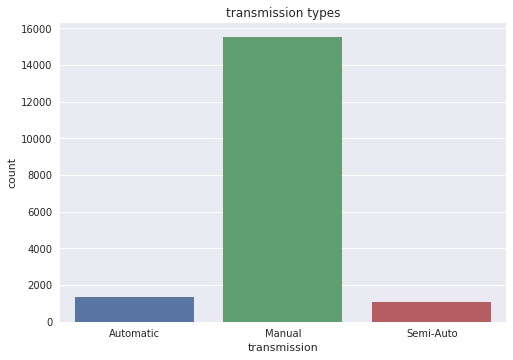

In [9]:
sns.countplot(x="transmission", data=df)
plt.title("transmission types")
plt.show()

Simple pie chart to show the transmission types

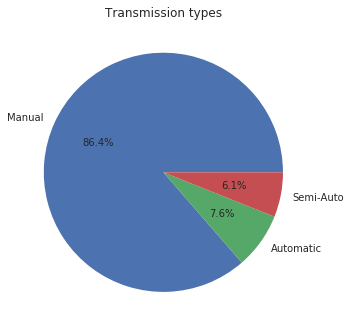

In [10]:
tags =df["transmission"].value_counts()
tags.plot(kind='pie' , autopct = '%1.1f%%' , label='')
plt.title('Transmission types')
plt.show()

To visualise the count of different fuel types on x-axis.

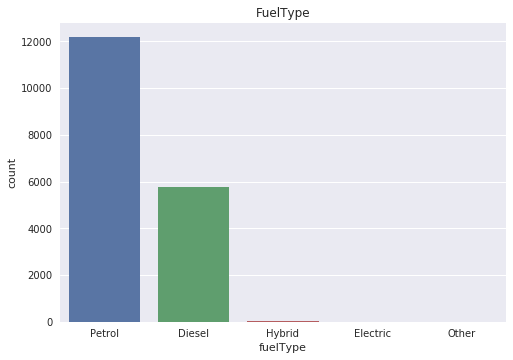

In [11]:
sns.countplot(x='fuelType',data=df)
plt.title("FuelType")
plt.show()

To visualise the count of different fuel types on y-axis.

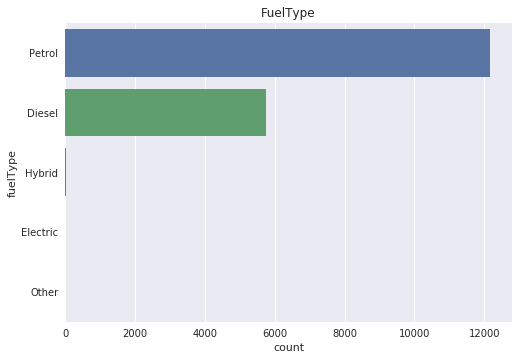

In [12]:
sns.countplot(y='fuelType',data=df)
plt.title("FuelType")
plt.show()

But we cannot see the count of hybrid,electric and other fuel types since it is too low, therefore used the counts function.

In [13]:
print(df['fuelType'].value_counts())

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


In [14]:
fueltype = df['fuelType']
transmission = df['transmission']
price = df['price']

Based on fuel type - Hybrid vehicles have a higher price point. Based on transmission type - Automatic vehicles  have higher price point.

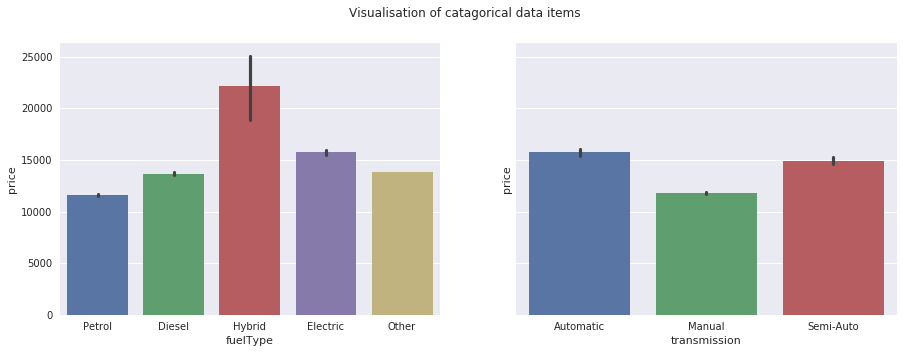

In [15]:
fig , axes = plt.subplots(1,2 , figsize = (15,5) ,sharey=True)
fig.suptitle('Visualisation of catagorical data items')
sns.barplot(x='fuelType', y='price', ax=axes[0], data = df)
sns.barplot(x='transmission' , y='price' , ax=axes[1], data = df)

Using boxen plot to show above with more clarity

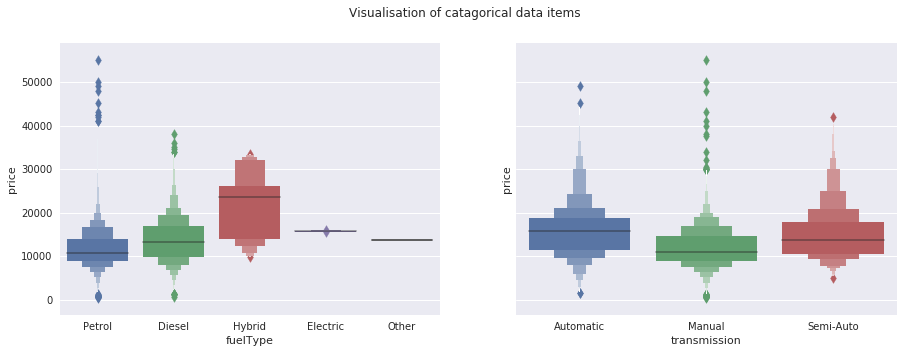

In [16]:
fig , axes = plt.subplots(1,2 , figsize = (15,5) ,sharey=True) 
fig.suptitle('Visualisation of catagorical data items')
sns.boxenplot(x='fuelType', y='price', ax=axes[0], data = df)
sns.boxenplot(x='transmission' , y='price' , ax=axes[1], data = df)

Shows that cars are in the range from year 2000 to 2020

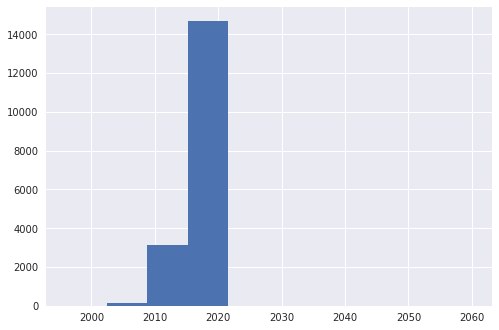

In [17]:
df['year'].hist()

Visualisation of price in the dataset

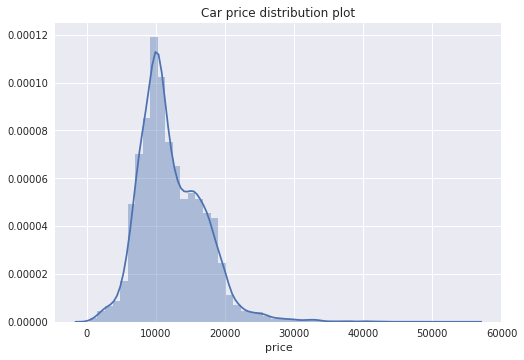

In [18]:
sns.distplot(df.price)
plt.title('Car price distribution plot')
plt.show()

Visualise all other numerical data using histogram

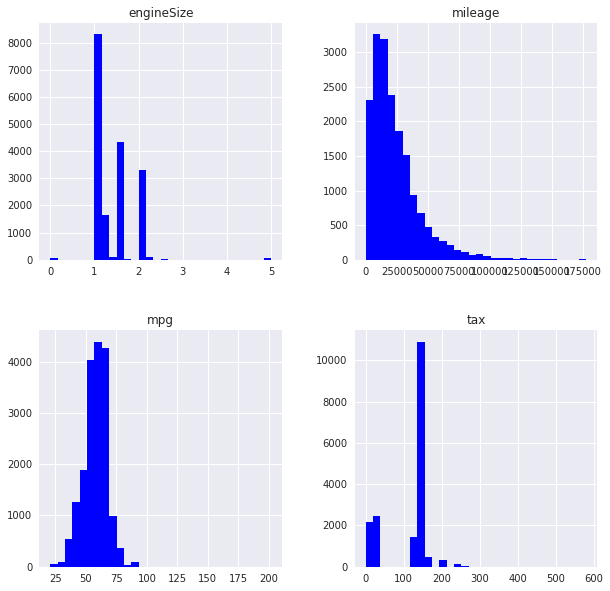

In [19]:
df[['mileage','tax','mpg','engineSize']].hist(bins=30 ,figsize=(10,10),color='blue')
plt.show()

Visualise how price of the car is dependent on its fuel economy.
 Setting hue as transmission type to see its effect on the plot.

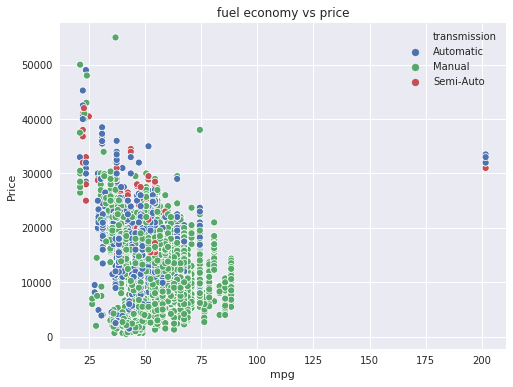

In [20]:
plt.figure(figsize=(8,6))
plt.title('fuel economy vs price')
sns.scatterplot(x=df['mpg'], y= df['price'],hue=df['transmission'])
plt.ylabel('Price')
plt.show()

Visualise how price of the car is dependent on its fuel economy. Setting hue as fuel type to see its effect on the plot.

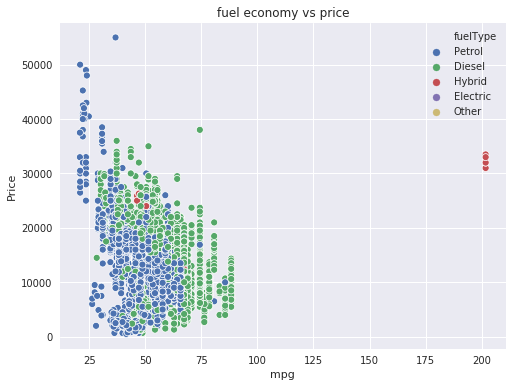

In [21]:
plt.figure(figsize=(8,6))
plt.title('fuel economy vs price')
sns.scatterplot(x=df['mpg'], y= df['price'],hue=df['fuelType'])
plt.ylabel('Price')
plt.show()

Ordinal encoding done to convert the categorical values to numerical values by assigning an integer value to each unique entry in the categorical column.

In [22]:
df.replace({'transmission': {'Manual':0 , 'Automatic':1 , 'Semi Automatic': 2}},inplace =True)
df.replace({'fuelType':{'Petrol':0 , 'Diesel':1 ,'Hybrid': 2 , 'Electric' : 3, 'Other':4}}, inplace=True)

Checking the modified dataframe

In [23]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,1,15944,0,150,57.7,1.0
1,Focus,2018,14000,0,9083,0,150,57.7,1.0
2,Focus,2017,13000,0,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,0,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,1,1482,0,145,48.7,1.0


Visualistion of different Model type cars in the dataset

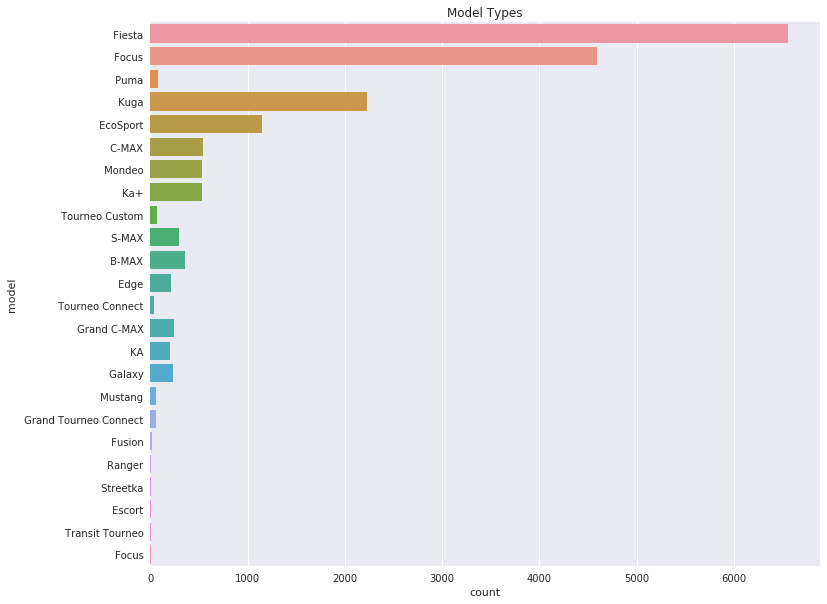

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(y='model',data=df)
plt.title('Model Types')
plt.show()

But we cannot see the count of some cars since its value must be too low, therefore used the counts function.

In [25]:
print(df['model'].value_counts())

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Escort                      1
 Ranger                      1
Focus                        1
 Transit Tourneo             1
Name: model, dtype: int64


Removing the model column from the dataset

In [26]:
modified_df = df.drop("model" , axis=1)
modified_df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


In [27]:
df.corr()

,year,price,mileage,fuelType,tax,mpg,engineSize
year,1.000000,0.636009,-0.707818,-0.084931,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,-0.530659,0.209225,0.406857,-0.346419,0.411178
mileage,-0.707818,-0.530659,1.000000,0.254271,-0.260451,0.120075,0.215035
fuelType,-0.084931,0.209225,0.254271,1.000000,-0.130713,0.307244,0.644944
tax,0.298506,0.406857,-0.260451,-0.130713,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,0.120075,0.307244,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.215035,0.644944,0.184363,-0.260521,1.000000


Showing correlation with the help of heatmap. Light values indicate the high correlation and darker values indicate the low correlation.
 We can infer that the price has a high correlation with the year.

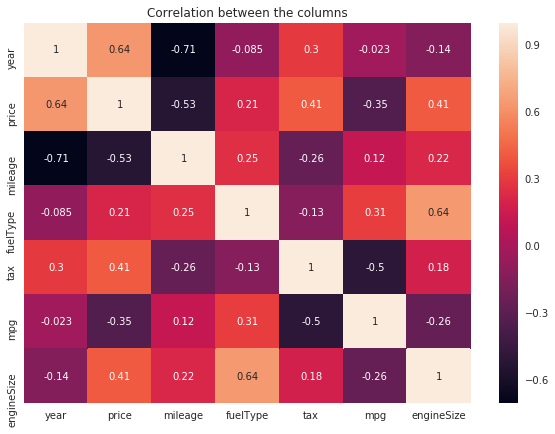

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr() , annot=True)
plt.title("Correlation between the columns")
plt.show()

Price of used car will depend on its manufacturing year followed by its enginesize and tax.

In [29]:
df.corr()['price'].sort_values()

mileage      -0.530659
mpg          -0.346419
fuelType      0.209225
tax           0.406857
engineSize    0.411178
year          0.636009
price         1.000000
Name: price, dtype: float64

Regression plot to check correlation between manufacturing year and price of the car

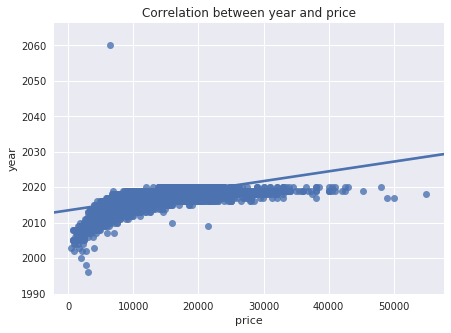

In [30]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='price' , y='year' , data=df)